<a href="https://colab.research.google.com/github/akshu-2004/Tree-specie-classification/blob/main/week2(code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/akshu-2004/Tree-specie-classification

Cloning into 'Tree-specie-classification'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 108 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (108/108), 1.29 MiB | 15.70 MiB/s, done.


In [ ]:
import os

repo_path = "Tree_Specie_Dat"  # Adjust if cloned to a different name
print("Contents:", os.listdir(repo_path))

Contents: ['other', 'nilgiri', 'neem', 'sitafal', 'sonmahor', 'pilikaren', 'pipal', 'vad', 'simlo', 'shirish', 'saptaparni', 'sugarcane', 'mango', 'gunda', 'kesudo', 'motichanoti', 'gulmohor', 'khajur', 'kanchan', 'jamun', 'champa', 'garmalo', 'cactus', 'amla', 'babul', 'coconut', 'bili', 'banyan', 'asopalav', 'bamboo', '.git']


In [29]:
num_classes = train_generator.num_classes
print("Number of classes:", num_classes)  # Should be 31


Number of classes: 31


In [5]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 806


In [6]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

          Image Count
other             152
nilgiri            51
neem               50
sitafal            50
sonmahor           50
shape:  (31, 1)


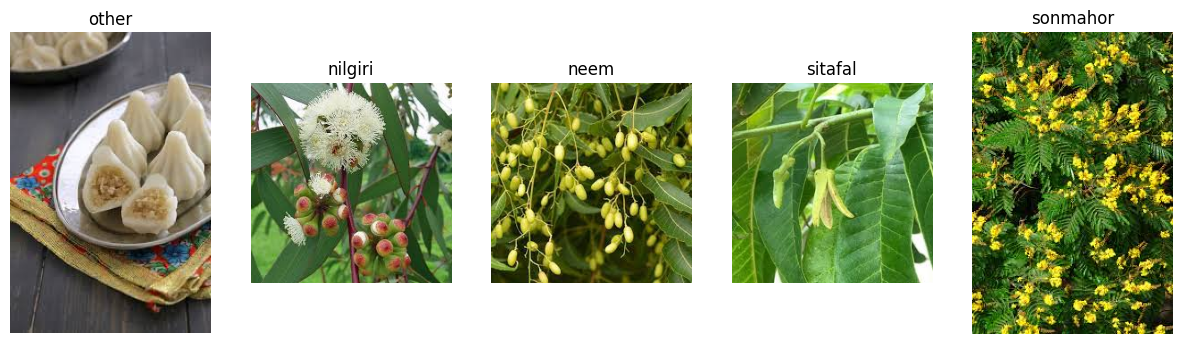

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)

In [11]:

import os
from PIL import Image
import pandas as pd

# Set the root directory where image folders are stored
repo_path = "/content/drive/MyDrive/Tree_Species_Dataset"

# Get class folders only (skip files like .git, README, etc.)
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]

# Store height and width of images
image_shapes = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        # Skip if it's a directory or hidden file
        if os.path.isdir(img_path) or img_file.startswith('.'):
            continue

        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_shapes.append((height, width))  # note: (height, width)
        except Exception as e:
            print(f"Skipping {img_path}: {e}")

# Create DataFrame and show output
shapes_df = pd.DataFrame(image_shapes, columns=["Height", "Width"])
print(shapes_df.head())


   Height  Width
0     275    183
1     532    751
2     720    497
3     225    225
4     171    294


In [12]:
print(shapes_df.describe())

            Height        Width
count   804.000000   804.000000
mean    302.909204   358.312189
std     368.375834   392.343908
min     130.000000   151.000000
25%     183.000000   225.000000
50%     195.000000   260.000000
75%     259.000000   289.000000
max    4032.000000  4000.000000


In [15]:
import os
import hashlib
from collections import defaultdict

repo_path = "/content/drive/MyDrive/Tree_Species_Dataset"

# Get class directories only
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        # ✅ Skip directories or hidden files
        if os.path.isdir(img_path) or img_file.startswith('.'):
            continue

        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)
        except Exception as e:
            print(f"Skipping {img_path}: {e}")

# Filter duplicate image sets
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

# Optional: Show first 3 duplicate sets
for i, (h, files) in enumerate(duplicates.items()):
    print(f"\nDuplicate Set {i+1}:")
    for file in files:
        print(" -", file)
    if i == 2:
        break



Duplicate image sets found: 40

Duplicate Set 1:
 - /content/drive/MyDrive/Tree_Species_Dataset/other/images.jpeg
 - /content/drive/MyDrive/Tree_Species_Dataset/other/images (2).jpeg

Duplicate Set 2:
 - /content/drive/MyDrive/Tree_Species_Dataset/other/Image_19.jpg
 - /content/drive/MyDrive/Tree_Species_Dataset/other/Image_19 (1).jpg

Duplicate Set 3:
 - /content/drive/MyDrive/Tree_Species_Dataset/nilgiri/download (6).jpeg
 - /content/drive/MyDrive/Tree_Species_Dataset/nilgiri/download (6) (1).jpeg


In [16]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))


Corrupted images: 2


In [18]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 7
🔺 Very large images: 34


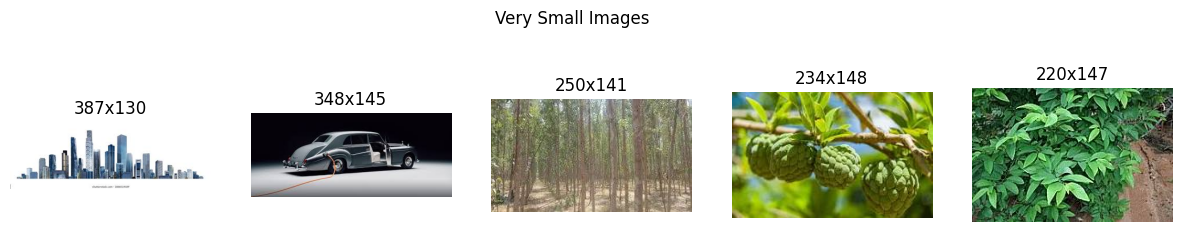

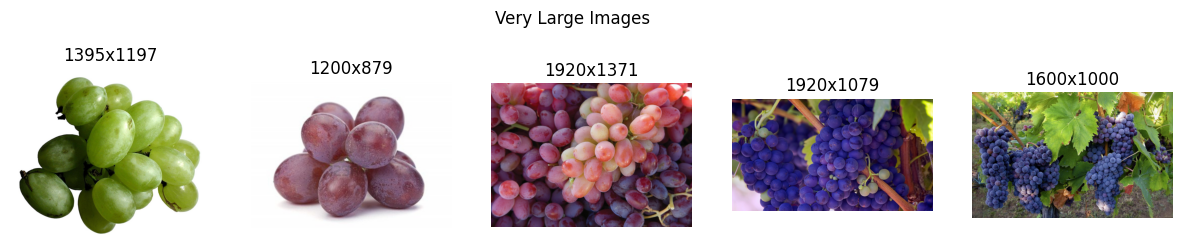

In [19]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [20]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 41 outlier images (small + large).


In [21]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count   763.000000   763.000000
mean    288.981651   243.204456
std     127.698195   118.951434
min     151.000000   151.000000
25%     225.000000   183.000000
50%     259.000000   194.000000
75%     276.000000   259.000000
max    1000.000000  1102.000000


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 612 images belonging to 31 classes.
Found 151 images belonging to 31 classes.


In [23]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [24]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.1130 - loss: 3.1242 - val_accuracy: 0.1656 - val_loss: 2.7033
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.1005 - loss: 2.7974 - val_accuracy: 0.1656 - val_loss: 2.6430
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.1501 - loss: 2.7442 - val_accuracy: 0.1656 - val_loss: 2.6206
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.1326 - loss: 2.7515 - val_accuracy: 0.1656 - val_loss: 2.6413
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.1537 - loss: 2.7010 - val_accuracy: 0.1656 - val_loss: 2.6253
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.1354 - loss: 2.6610 - val_accuracy: 0.1656 - val_loss: 2.6201
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.1411 - loss: 2.6932 - val_accuracy: 0.1656 - val_loss: 2.6077
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.1544 - loss: 2.6689 - val_accuracy: 0.1656 - val_loss:

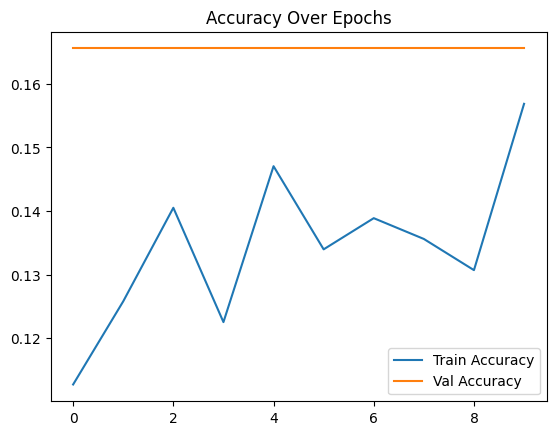

In [25]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 612 images belonging to 31 classes.
Found 151 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 95s 5s/step - accuracy: 0.0831 - loss: 3.8817 - val_accuracy: 0.1788 - val_loss: 2.6724
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.1931 - loss: 2.6581 - val_accuracy: 0.2583 - val_loss: 2.3909
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.2245 - loss: 2.4856 - val_accuracy: 0.2848 - val_loss: 2.1488
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.2523 - loss: 2.3038 - val_accuracy: 0.2914 - val_loss: 2.1183
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.2655 - loss: 2.1724 - val_accuracy: 0.3709 - val_loss: 2.0145
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.3284 - loss: 2.0704 - val_accuracy: 0.3709 - val_loss: 2.0395
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.3538 - loss: 1.9772 - val_accuracy: 0.4040 - val_loss: 2.0267
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.3407 - loss: 1.9170 - val_accuracy: 0.4371 - val_loss:

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


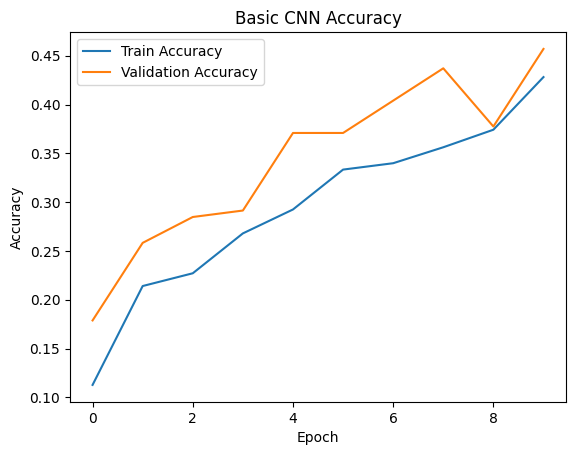

In [27]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
# Import Libraries
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths and image settings
data_dir = '/content/drive/MyDrive/Tree_Species_Dataset'  # ✅ Make sure this path is correct
img_height, img_width = 224, 224
batch_size = 32

# Create ImageDataGenerators with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% training, 20% validation
)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load Validation Data
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Automatically detect number of classes
num_classes = train_generator.num_classes
print("Detected number of classes:", num_classes)

# Build CNN Model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25
)

# Save the model
model.save("improved_cnn_model.h5")
print("Model saved as improved_cnn_model.h5")


Found 612 images belonging to 31 classes.
Found 151 images belonging to 31 classes.
Detected number of classes: 31
Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.1782 - loss: 6.0745 - val_accuracy: 0.0000e+00 - val_loss: 4.4189
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.4374 - loss: 2.0803 - val_accuracy: 0.0000e+00 - val_loss: 7.3810
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.5713 - loss: 1.3030 - val_accuracy: 0.0000e+00 - val_loss: 10.7977
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.6823 - loss: 1.0708 - val_accuracy: 0.0000e+00 - val_loss: 13.7245
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.7079 - loss: 0.9484 - val_accuracy: 0.0132 - val_loss: 13.8095
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.8007 - loss: 0.6112 - val_accuracy: 0.0397 - val_loss: 14.1879
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.8233 - loss: 0.5379 - val_accuracy: 0.

Model saved as improved_cnn_model.h5
